# Model Development
After completing this lab you will be able to:

Develop prediction models
In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

Some questions we want to ask in this module

Do I know if the dealer is offering fair value for my trade-in?
Do I know if I put a fair value on my car?
In data analytics, we often use Model Development to help us predict future observations from the data we have.

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

In [2]:
# Downalod the csv file
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

response = requests.get(file_path)
with open("automobileEDA.csv", "wb") as file:
    file.write(response.content)

In [4]:
os.rename("automobileEDA.csv", "automobile.csv")

In [6]:
df=pd.read_csv("automobile.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Linear Regression and Multiple Linear Regression

### Linear Function
##### Formula: Yhat = a + bX


#### Now Let's load the modules for linear regression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lm = LinearRegression()
lm

LinearRegression()

### How could "highway-mpg" help us predict car price?
* For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [13]:
X = df[["highway-mpg"]]
Y = df["price"]
lm.fit(X, Y)
# We can output a prediction:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

#### What is the value of the intercept (a)?

In [14]:
lm.intercept_

np.float64(38423.3058581574)

#### What is the value of the slope (b)?

In [15]:
lm.coef_

array([-821.73337832])

# What is the final estimated linear model we get?

## Question #1 a): 
Create a linear regression object called "lm1".

In [16]:
lm1 = LinearRegression()
lm1

LinearRegression()

## Question #1 b): 
Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [19]:
X1 = df[["engine-size"]]
Y1 = df["price"]
lm1.fit(X1, Y1)
lm1

LinearRegression()

## Question #1 c):¶
Find the slope and intercept of the model.

In [20]:
lm1.intercept_ # intercent

np.float64(-7963.338906281027)

In [21]:
lm1.coef_ # slope

array([166.86001569])

## Question #1 d):
What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

In [23]:
Yhat = lm1.predict(X1)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

# Multiple Linear Regression
What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

* Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4

* The equation is given by:
From the previous section we know that other good predictors of price could be:

Horsepower
Curb-weight
Engine-size
Highway-mpg
Let's develop a model using these variables as the predictor variables.

In [24]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [25]:
lm.fit(Z, df['price'])

LinearRegression()

What is the value of the intercept(a)?

In [26]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [27]:
lm.intercept_

np.float64(-15806.62462632922)

# Model Evaluation Using Visualization

(0.0, 48194.383815623)

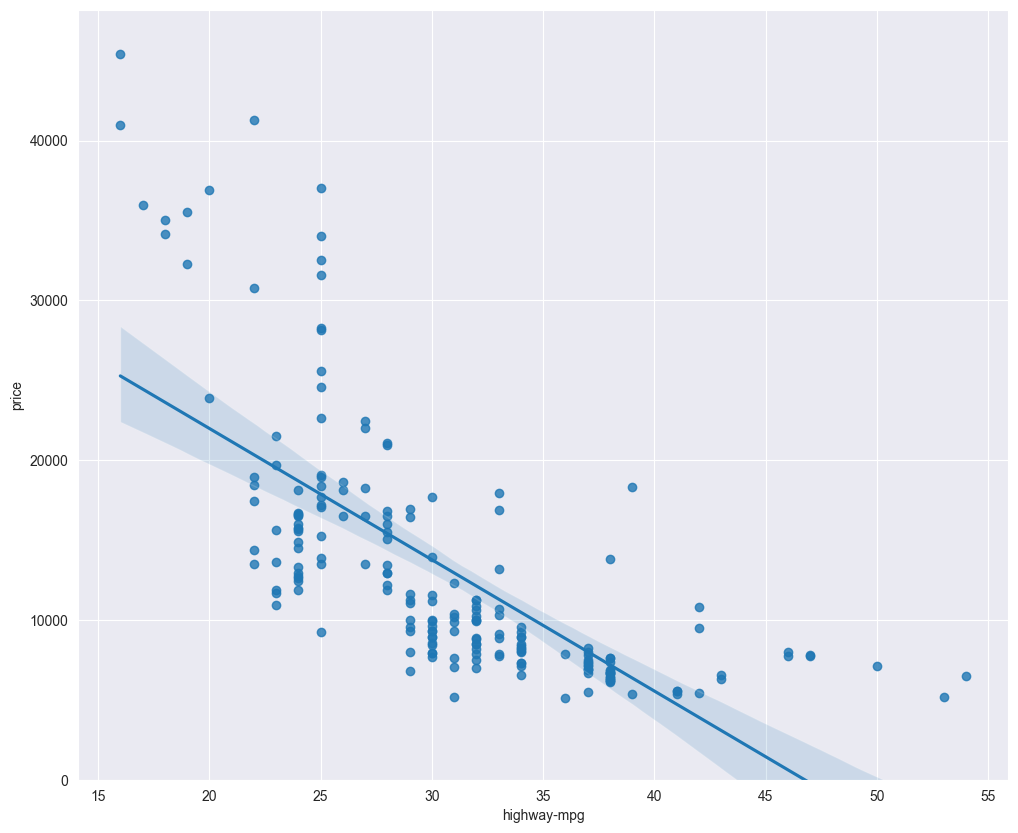

In [28]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

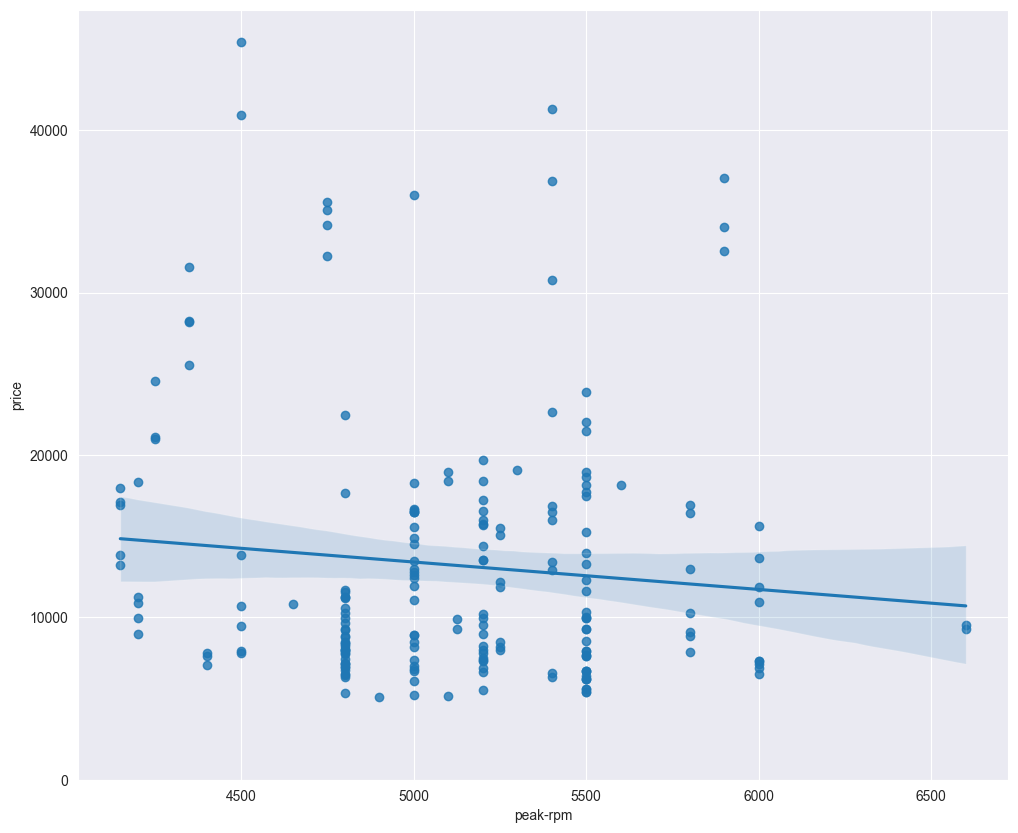

In [29]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

## Residual Plot
A good way to visualize the variance of the data is to use a residual plot.

### What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

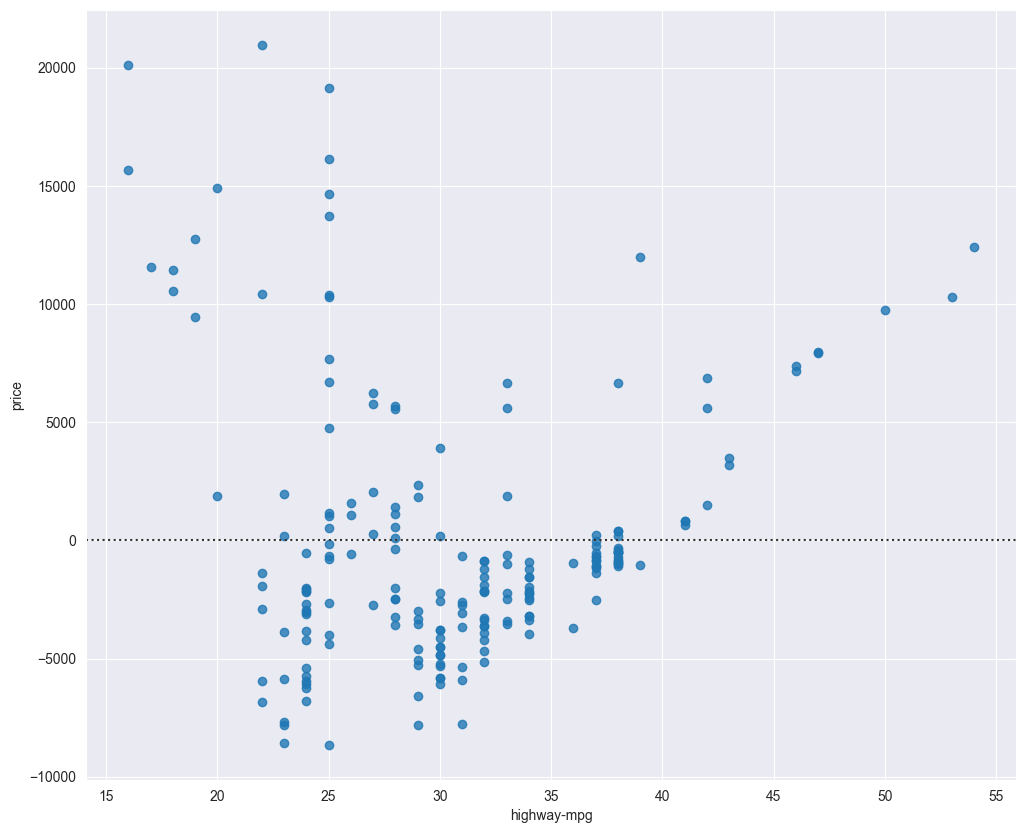

In [32]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

### Multiple Linear Regression

In [33]:
Y_hat = lm.predict(Z)

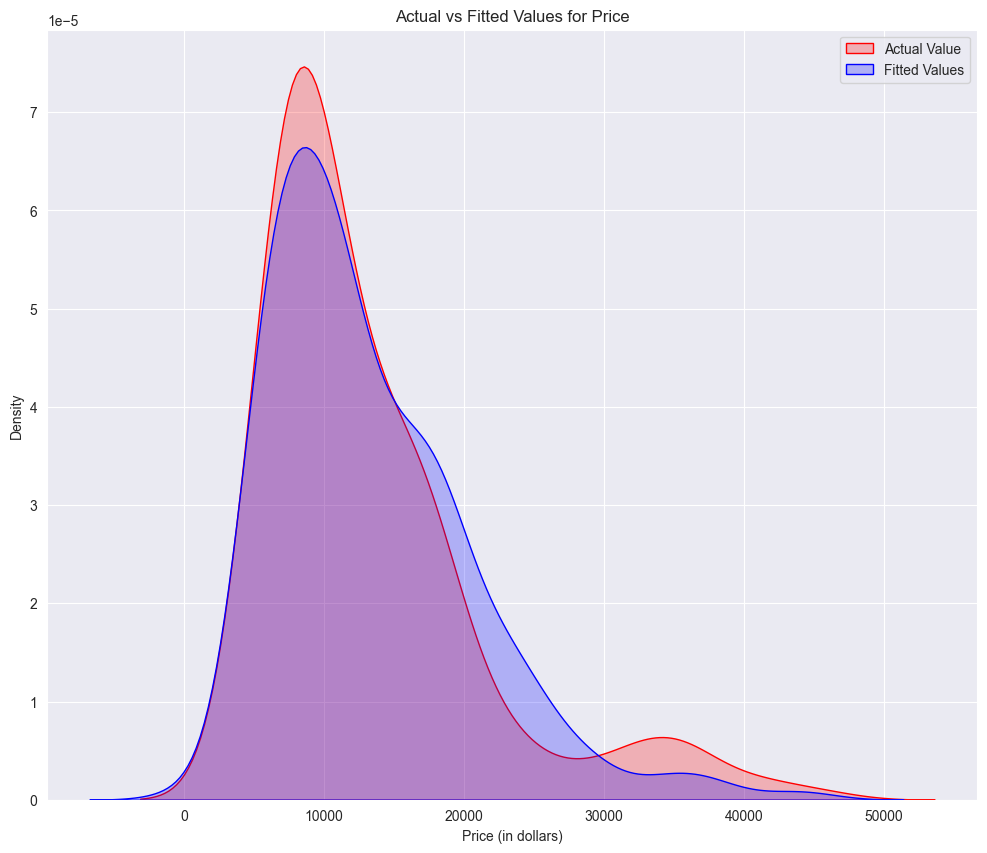

In [35]:
plt.figure(figsize=(width, height))

# KDE plot for actual values
ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value", fill=True)

# KDE plot for fitted values
sns.kdeplot(Y_hat, color="b", label="Fitted Values", fill=True, ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Density')

plt.legend()
plt.show()

# Polynomial Regression and Pipelines

In [39]:
import numpy as np
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [40]:
x = df['highway-mpg']
y = df['price']

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


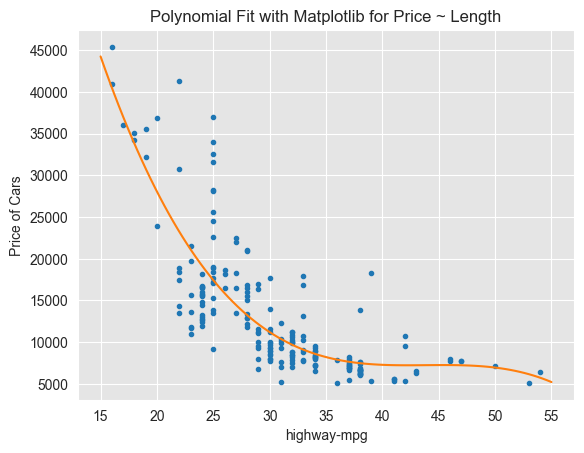

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [41]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 3)

# Prediction and Decision Making

In [42]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [45]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

lm.fit(X, Y)
lm

The R-square is:  0.4965911884339176


LinearRegression()

In [47]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [48]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [51]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [53]:
lm.fit(X, Y)
lm
yhat=lm.predict(new_input)
yhat[0:5]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

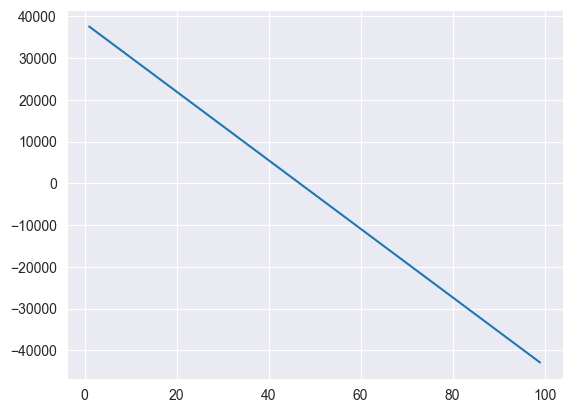

In [54]:
plt.plot(new_input, yhat)
plt.show()

#Decision Making: Determining a Good Model Fit
##### Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

##### What is a good R-squared value?
##### When comparing models, the model with the higher R-squared value is a better fit for the data.

##### What is a good MSE?
##### When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759
MSE: 3.16 x10^7
Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497
MSE: 1.2 x10^7
Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514
MSE: 2.05 x 10^7